# Assignment 7

In [ ]:
#!pip install statsmodels
#!pip install pgmpy
#!pip install pingouin

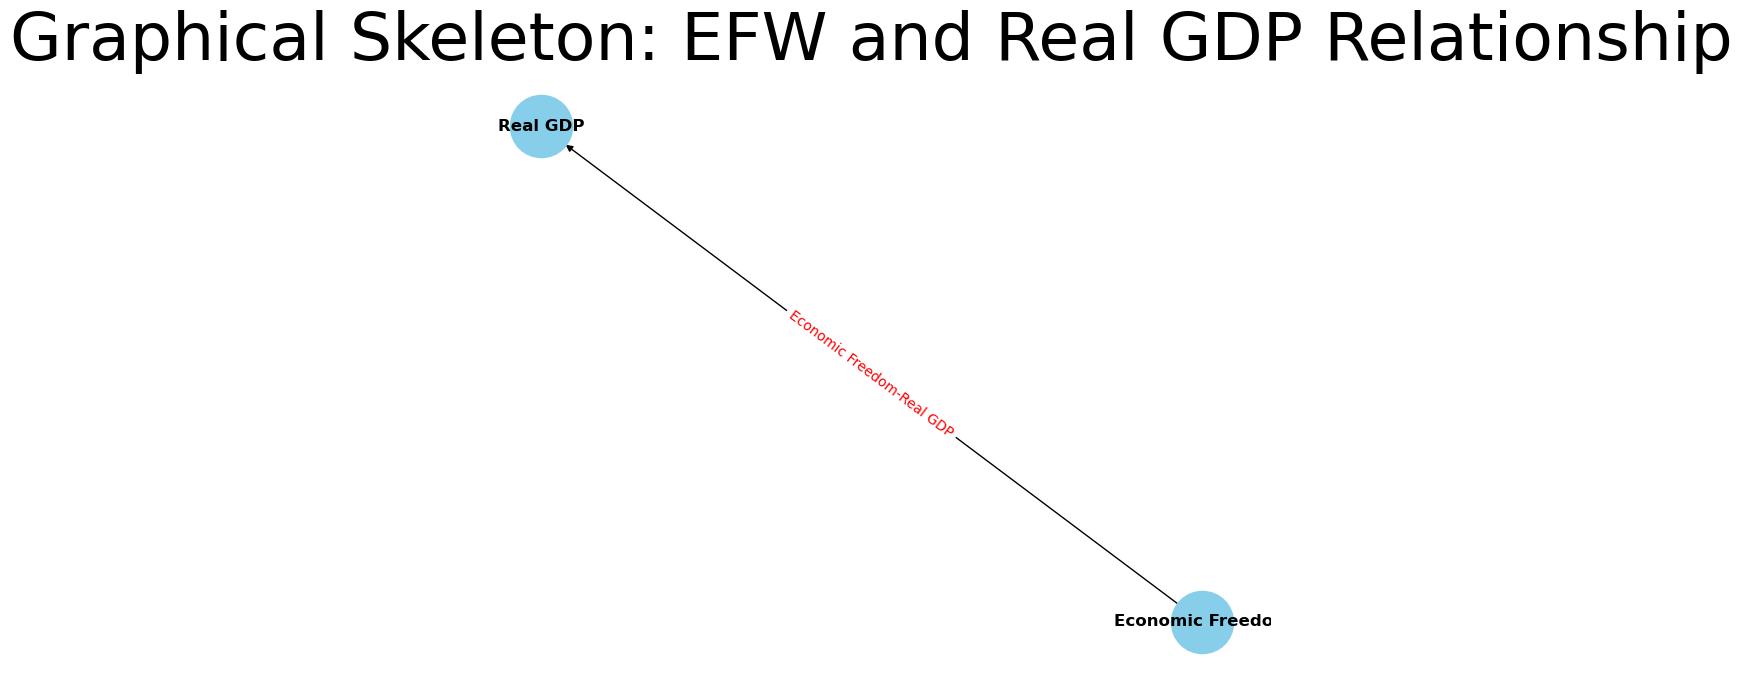

In [50]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
graph = nx.DiGraph()

# Define nodes
nodes = ['Economic Freedom', 'Real GDP']

# Add nodes to the graph
graph.add_nodes_from(nodes)

# Define edges
edges = [('Economic Freedom', 'Real GDP')]

# Add edges to the graph
graph.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)  # positions for all nodes
nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='skyblue', font_size=12, font_weight='bold', arrows=True)
nx.draw_networkx_edge_labels(graph, pos, edge_labels={(u, v): f"{u}-{v}" for u, v in graph.edges()}, font_color='red')

# Show the graph
plt.title('Graphical Skeleton: EFW and Real GDP Relationship')
plt.axis('off')
plt.show()


C:\Users\tazee\AppData\Local\Temp\ipykernel_11172\3825890940.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col=[0, 1], parse_dates=True).rename(columns={"Summary": "EFW"})


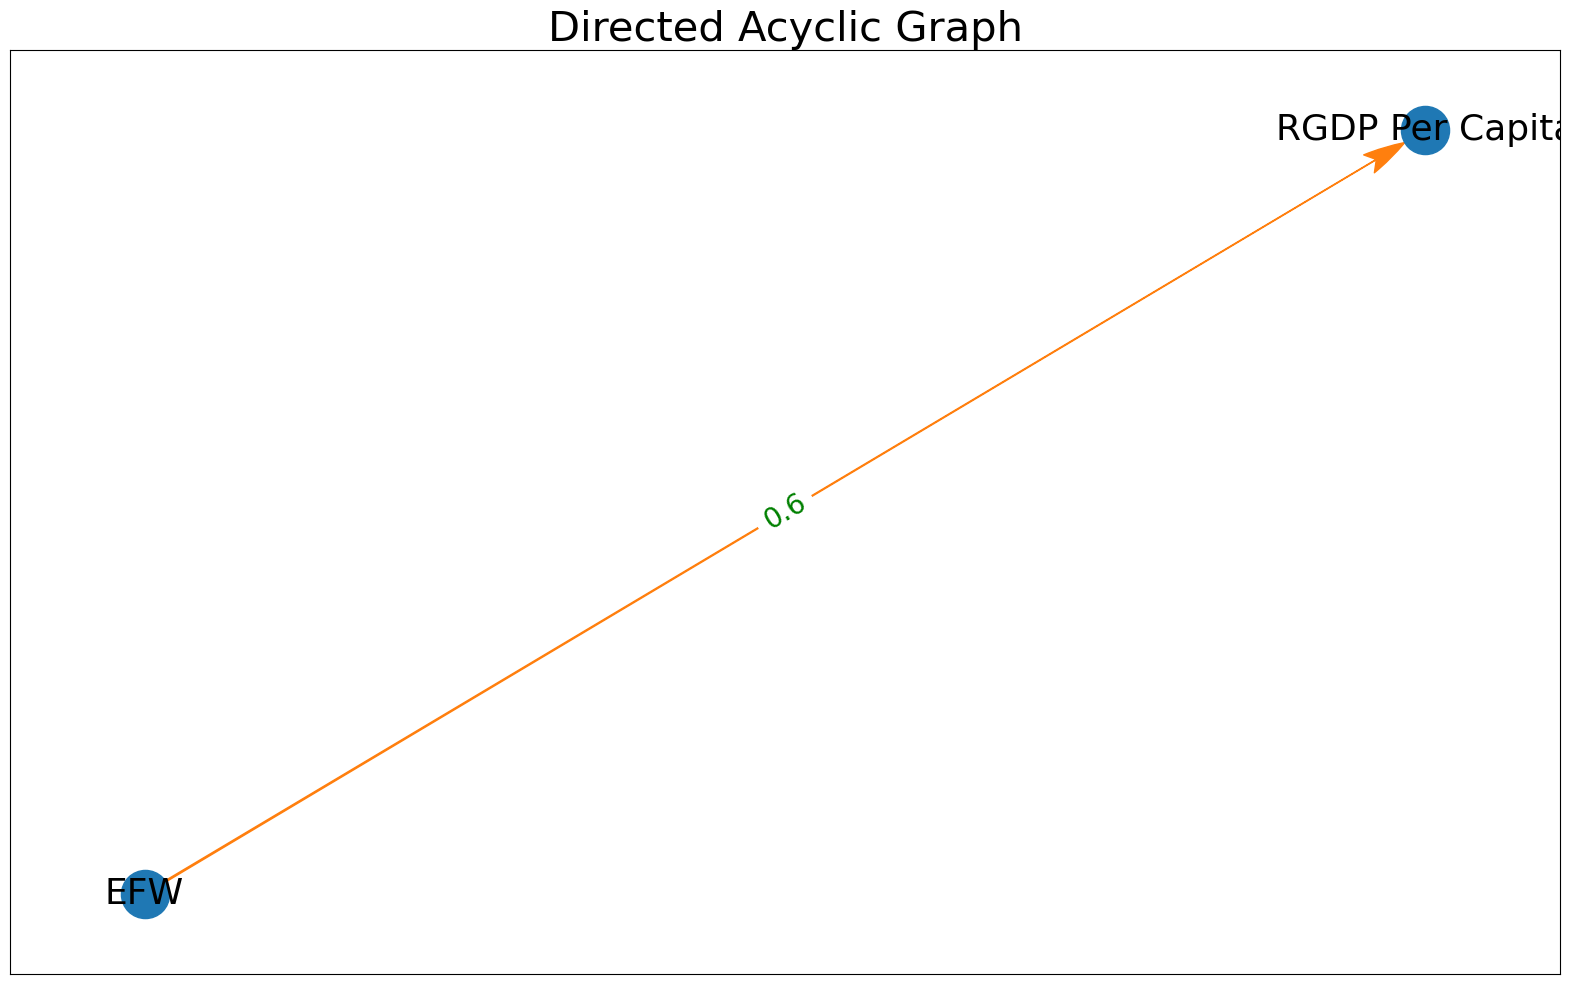

In [55]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle

def graph_DAG(edges, df, title=""):
    graph = nx.DiGraph()
    edge_labels = {}
    
    for edge in edges:
        pcorr = df[[edge[0], edge[1]]].pcorr()
        edge_labels[edge] = str(round(pcorr.loc[edge[0], edge[1]], 2))
    
    graph.add_edges_from(edges)
    
    fig, ax = plt.subplots(figsize=(20, 12))
    pos = nx.spring_layout(graph)
    
    plt.title(title, fontsize=30)
    nx.draw_networkx(graph, pos, node_size=1200, with_labels=True, arrows=True,
                     font_color="black", font_size=26, alpha=1, width=1, edge_color="C1",
                     arrowstyle=ArrowStyle("Fancy, head_length=3, head_width=1.5, tail_width=.1"), ax=ax)
    
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='green', font_size=20)

# Read data
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col=[0, 1], parse_dates=True).rename(columns={"Summary": "EFW"})

# Select columns for EFW and RGDP Per Capita
selected_data = data[['EFW', 'RGDP Per Capita']]

# Define edges
edges = [('EFW', 'RGDP Per Capita')]

# Create DAG
graph_DAG(edges, selected_data, title="Directed Acyclic Graph")
